status: optimal
Minimized Cost: $ 6306512.457307088


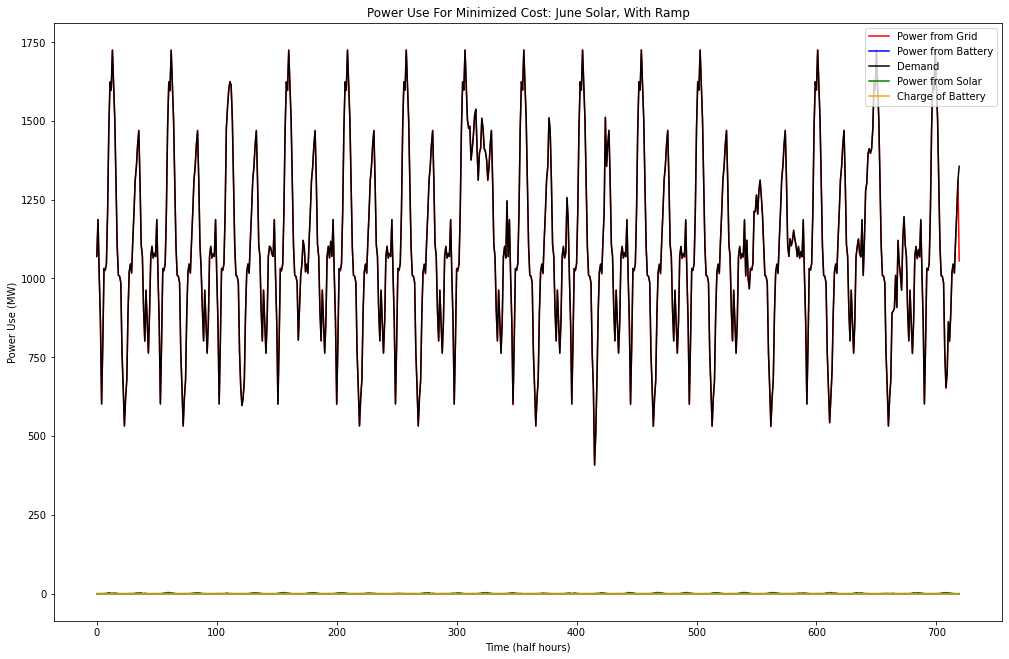

In [1]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 720 #hours

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 10.xlsx')
#print (df)
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]

#defining ramp values
P_ramp = 1200 #[MW/time] (1200 MW/hr) adjust based on time unit

#defining capacity of battery (random)
E_max = 300 # MW, randomly picked value
eff = 0.9

#defining power draw variables
P_g_1 = cp.Variable(t)
P_ch = cp.Variable(t)
P_dis = cp.Variable(t)

#setting up cost functions
#if given a cost for the power by hour, multiply the power use by the cost (ensure units match) to get total cost per plant
#the rest of the code below would remain the same, just the cost equations + data input would change
#$/MW

#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
#    C_1 = C_1 + [df.at[n, "Coal"]*P_g_1[n]]
#    C_b = C_b + [(df.at[n, "Coal"])*P_b[n]]
     C_1 = C_1 + [8*(P_g_1[n]+P_ch[n])]
     C_b = C_b + [8*P_dis[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)

#adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_j.xlsx')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] 
constraints += [P_ch >= 0] 
constraints += [1 >= eff] 
constraints += [P_dis >= 0] 
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_ch[n], E_max >= P_dis[n]] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]]
    n+1    
for n in range (0, t-1): #for each time step
    a = P_g_1[n]
    b = P_g_1[n+1]
    constraints += [(a - b) <= P_ramp, (a - b) >= -P_ramp] # ramp value limits change in power draw from each source
    n+1
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_ch.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (half hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: June Solar, With Ramp")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

#### No ramp included in the below scenarios

### Solar with random cost

status: optimal
Minimized Cost: $ 2716003.2474856963


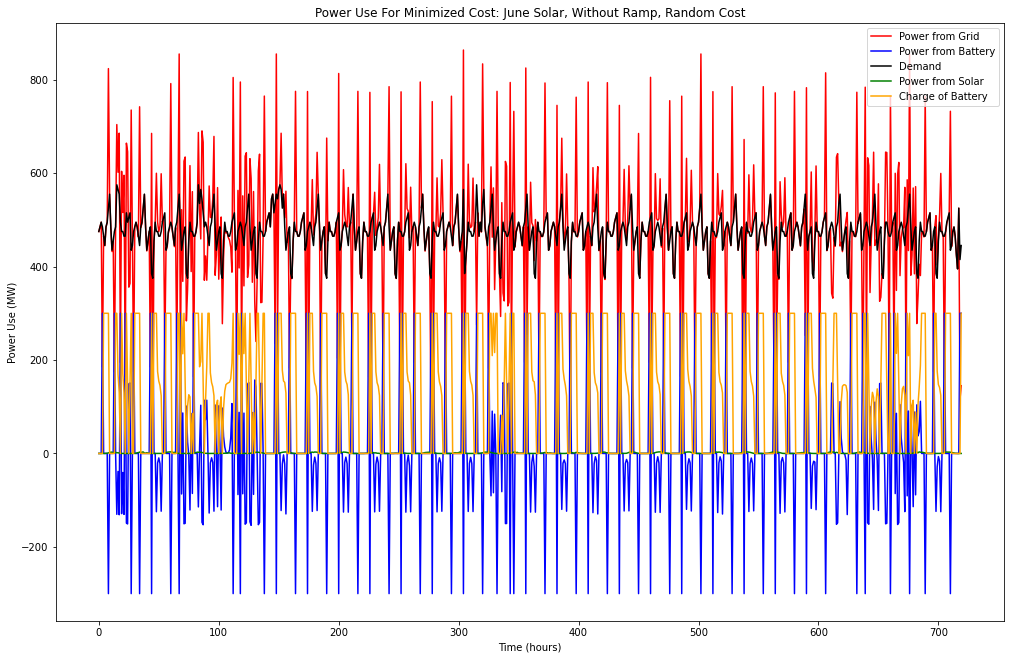

In [2]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 720 #hours

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 11.xlsx')
#print (df)
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]

#defining capacity of battery (random)
E_max = 300 # MW, randomly picked value

#defining power draw variables
P_g_1 = cp.Variable(t)
P_b = cp.Variable(t)

#setting up cost functions
#if given a cost for the power by hour, multiply the power use by the cost (ensure units match) to get total cost per plant
#the rest of the code below would remain the same, just the cost equations + data input would change
#$/MW

#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Cost"]*P_g_1[n]]
    C_b = C_b + [(df.at[n, "Cost"])*P_b[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)

#adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_j.xlsx')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_b + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0]    
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_b[n], -P_b[n] >= -E_max] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + P_b[n-1]]
    n+1    
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_b.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: June Solar, Without Ramp, Random Cost")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

status: optimal
Minimized Cost: $ 2718400.631472021


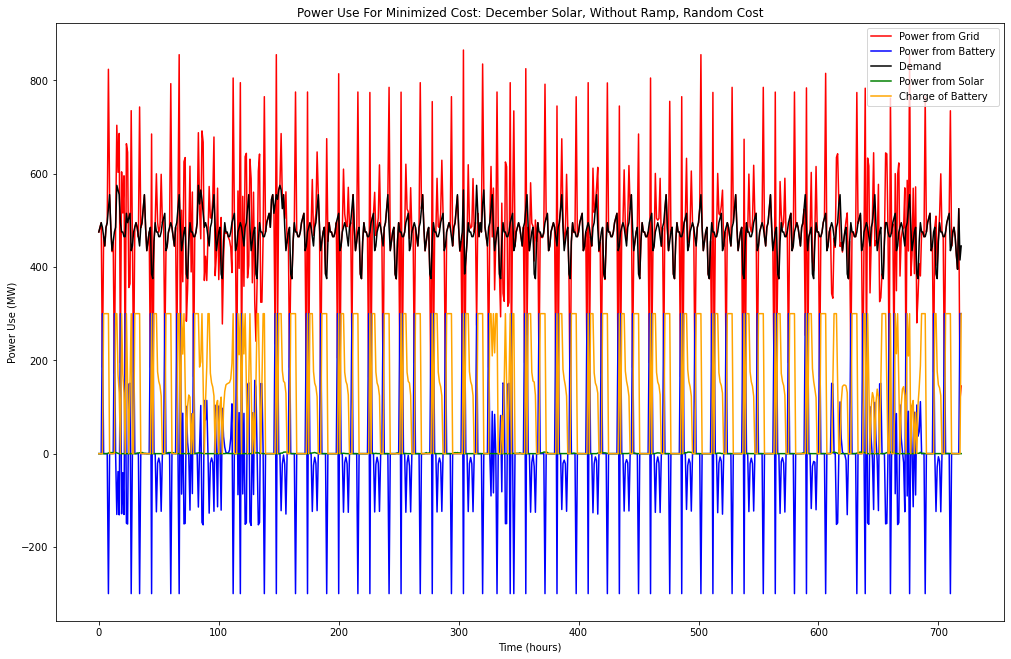

In [3]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 720 #hours

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 11.xlsx')
#print (df)
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]

#defining capacity of battery (random)
E_max = 300 # MW, randomly picked value

#defining power draw variables
P_g_1 = cp.Variable(t)
P_b = cp.Variable(t)

#setting up cost functions
#if given a cost for the power by hour, multiply the power use by the cost (ensure units match) to get total cost per plant
#the rest of the code below would remain the same, just the cost equations + data input would change
#$/MW

#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Cost"]*P_g_1[n]]
    C_b = C_b + [(df.at[n, "Cost"])*P_b[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)

#adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_d.xlsx')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_b + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0]    
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_b[n], -P_b[n] >= -E_max] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + P_b[n-1]]
    n+1    
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_b.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: December Solar, Without Ramp, Random Cost")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

### Solar with fixed cost

status: optimal
Minimized Cost: $ 2726579.9542091545


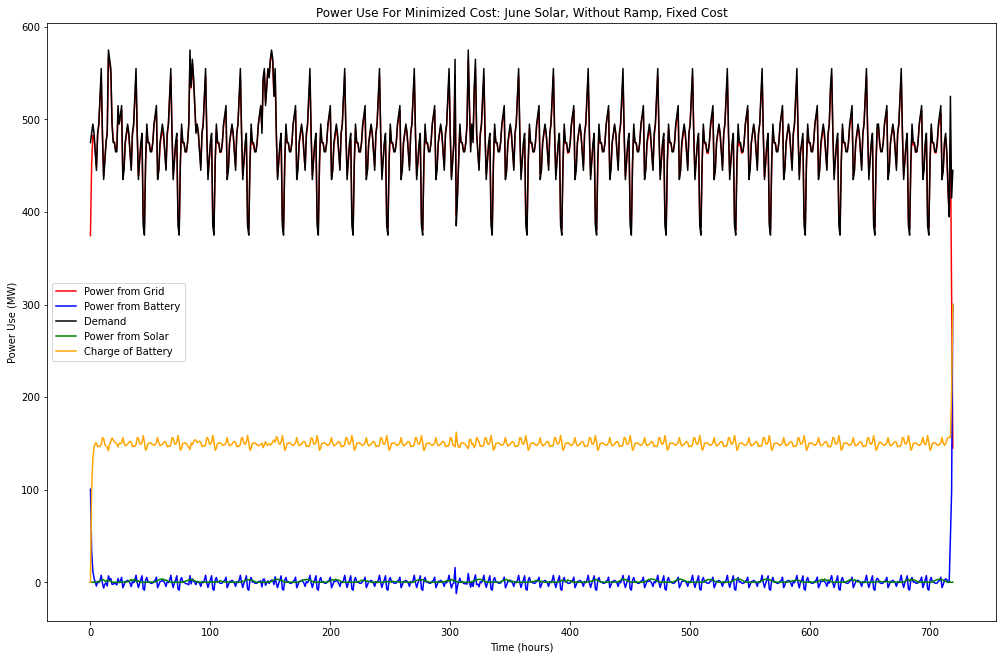

In [4]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 720 #hours

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 11.xlsx')
#print (df)
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]

#defining capacity of battery (random)
E_max = 300 # MW, randomly picked value

#defining power draw variables
P_g_1 = cp.Variable(t)
P_b = cp.Variable(t)

#setting up cost functions
#if given a cost for the power by hour, multiply the power use by the cost (ensure units match) to get total cost per plant
#the rest of the code below would remain the same, just the cost equations + data input would change
#$/MW

#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
    C_1 = C_1 + [8*P_g_1[n]]
    C_b = C_b + [8*P_b[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)

#adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_j.xlsx')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_b + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0]    
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_b[n], -P_b[n] >= -E_max] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + P_b[n-1]]
    n+1    
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_b.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: June Solar, Without Ramp, Fixed Cost")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

status: optimal
Minimized Cost: $ 2728965.454826561


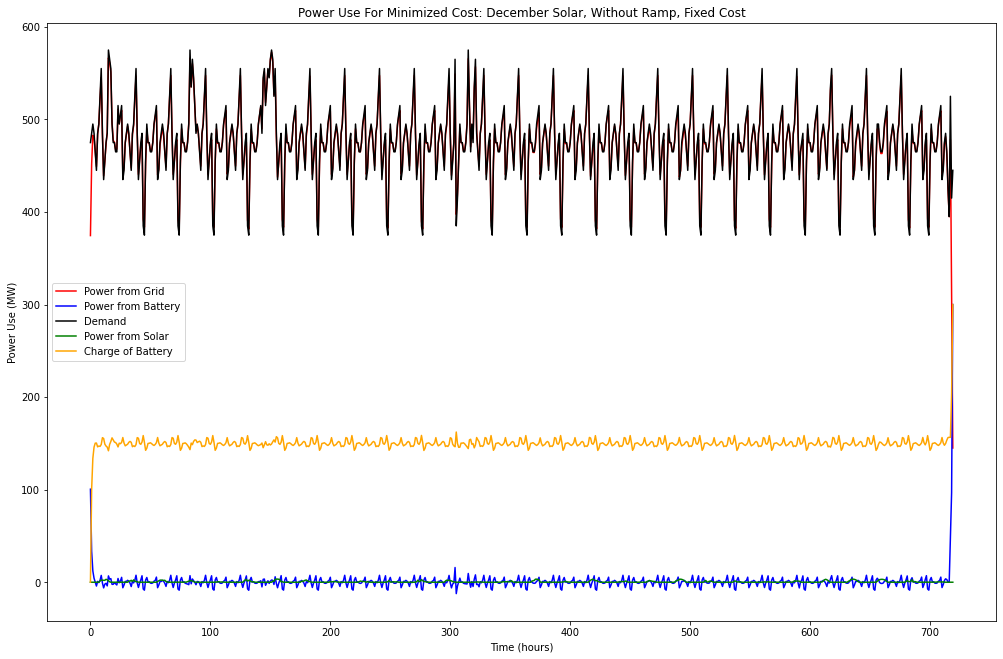

In [5]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 720 #hours

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 11.xlsx')
#print (df)
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]

#defining capacity of battery (random)
E_max = 300 # MW, randomly picked value

#defining power draw variables
P_g_1 = cp.Variable(t)
P_b = cp.Variable(t)

#setting up cost functions
#if given a cost for the power by hour, multiply the power use by the cost (ensure units match) to get total cost per plant
#the rest of the code below would remain the same, just the cost equations + data input would change
#$/MW

#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
    C_1 = C_1 + [8*P_g_1[n]]
    C_b = C_b + [8*P_b[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)

#adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_d.xlsx')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_b + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0]    
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_b[n], -P_b[n] >= -E_max] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + P_b[n-1]]
    n+1    
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_b.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: December Solar, Without Ramp, Fixed Cost")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

### Solar with battery losses random cost

status: optimal
Minimized Cost: $ 2728979.9549835064


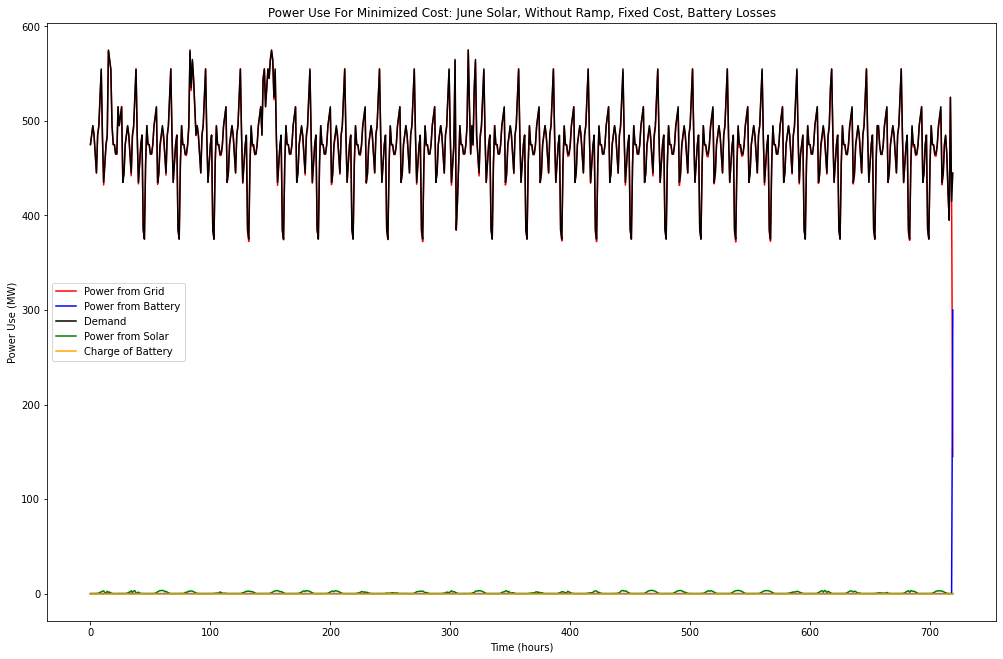

In [6]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 720 #hours

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 11.xlsx')
#print (df)
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    
#defining capacity of battery
E_max = 300 # MW, randomly picked value
eff = 0.9

#defining power draw variables
P_g_1 = cp.Variable(t)
P_ch = cp.Variable(t)
P_dis = cp.Variable(t)


#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
#    C_1 = C_1 + [df.at[n, "Coal"]*P_g_1[n]]
#    C_b = C_b + [(df.at[n, "Coal"])*P_b[n]]
     C_1 = C_1 + [8*P_g_1[n]]
     C_b = C_b + [8*P_dis[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)

#adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_j.xlsx')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] 
constraints += [P_ch >= 0] 
constraints += [1 >= eff] 
constraints += [P_dis >= 0] 
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_ch[n], E_max >= P_dis[n]] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]]
    n+1    
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: June Solar, Without Ramp, Fixed Cost, Battery Losses")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

status: optimal
Minimized Cost: $ 2730790.63165594


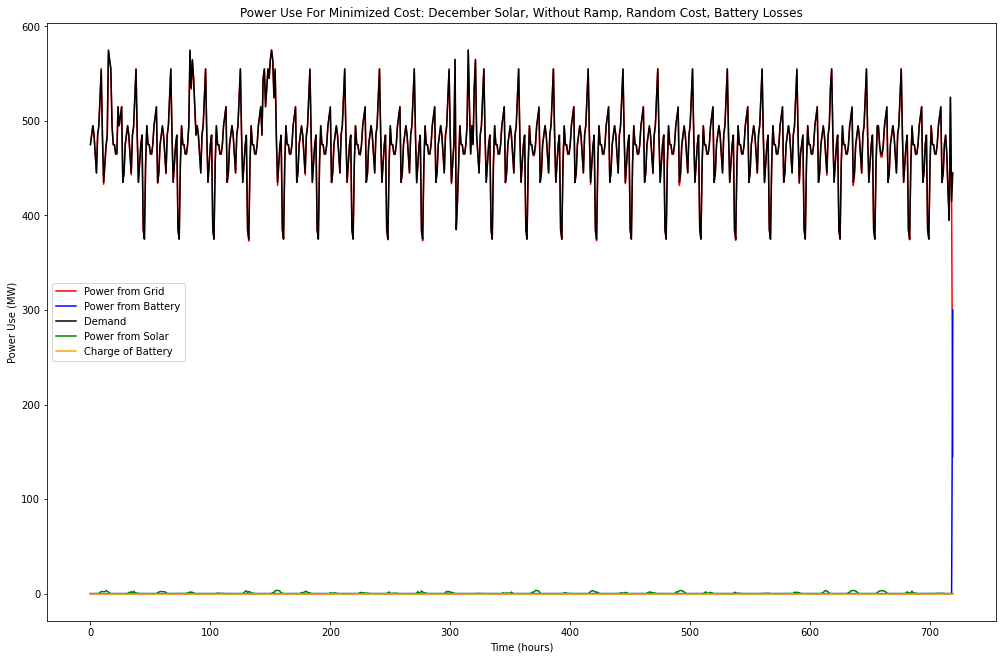

In [7]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 720 #hours

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 11.xlsx')
#print (df)
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    
#defining capacity of battery
E_max = 300 # MW, randomly picked value
eff = 0.9

#defining power draw variables
P_g_1 = cp.Variable(t)
P_ch = cp.Variable(t)
P_dis = cp.Variable(t)


#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
#    C_1 = C_1 + [df.at[n, "Coal"]*P_g_1[n]]
#    C_b = C_b + [(df.at[n, "Coal"])*P_b[n]]
     C_1 = C_1 + [df.at[n, "Cost"]*(P_g_1[n]+P_ch[n])]
     C_b = C_b + [df.at[n, "Cost"]*P_dis[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)

#adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_d.xlsx')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] 
constraints += [P_ch >= 0] 
constraints += [1 >= eff] 
constraints += [P_dis >= 0] 
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_ch[n], E_max >= P_dis[n]] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]]
    n+1    
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: December Solar, Without Ramp, Random Cost, Battery Losses")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

### Solar with battery losses fixed cost

status: optimal
Minimized Cost: $ 2728979.954368259


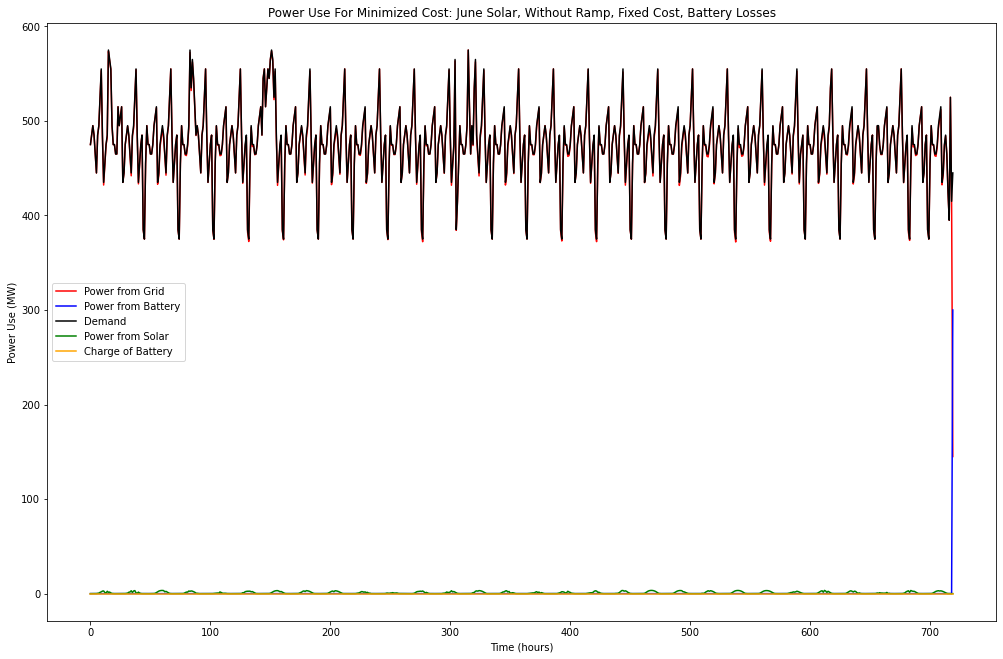

In [8]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 720 #hours

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 11.xlsx')
#print (df)
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    
#defining capacity of battery
E_max = 300 # MW, randomly picked value
eff = 0.9

#defining power draw variables
P_g_1 = cp.Variable(t)
P_ch = cp.Variable(t)
P_dis = cp.Variable(t)


#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
#    C_1 = C_1 + [df.at[n, "Coal"]*P_g_1[n]]
#    C_b = C_b + [(df.at[n, "Coal"])*P_b[n]]
     C_1 = C_1 + [8*(P_g_1[n]+P_ch[n])]
     C_b = C_b + [8*P_dis[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)

#adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_j.xlsx')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] 
constraints += [P_ch >= 0] 
constraints += [1 >= eff] 
constraints += [P_dis >= 0] 
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_ch[n], E_max >= P_dis[n]] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]]
    n+1    
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: June Solar, Without Ramp, Fixed Cost, Battery Losses")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

status: optimal
Minimized Cost: $ 2731365.4549856936


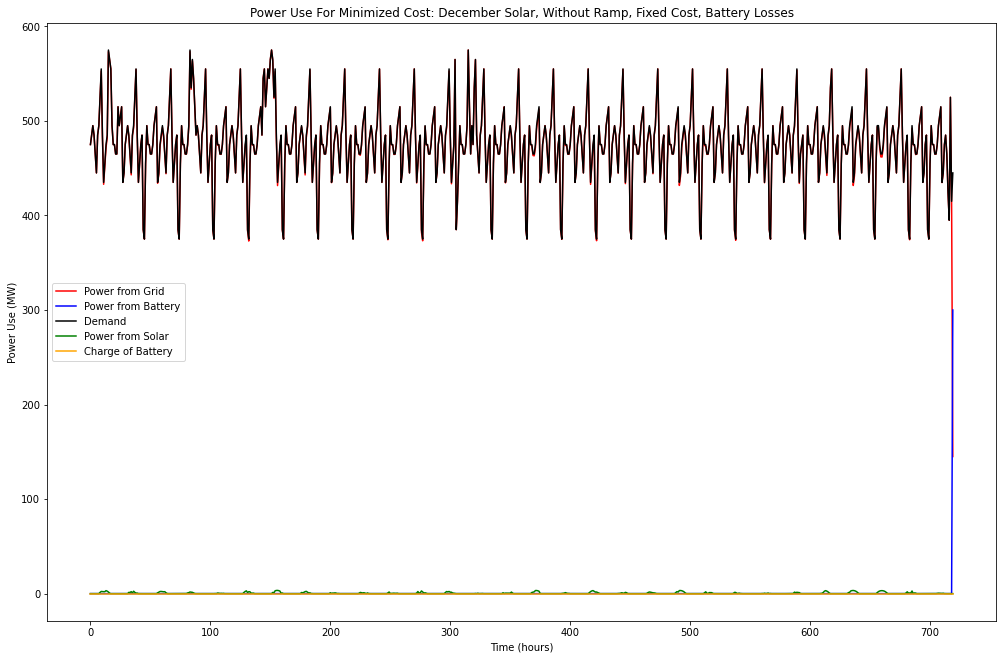

In [9]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 720 #hours

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 11.xlsx')
#print (df)
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    
#defining capacity of battery
E_max = 300 # MW, randomly picked value
eff = 0.9

#defining power draw variables
P_g_1 = cp.Variable(t)
P_ch = cp.Variable(t)
P_dis = cp.Variable(t)


#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
#    C_1 = C_1 + [df.at[n, "Coal"]*P_g_1[n]]
#    C_b = C_b + [(df.at[n, "Coal"])*P_b[n]]
     C_1 = C_1 + [8*(P_g_1[n]+P_ch[n])]
     C_b = C_b + [8*P_dis[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)

#adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_d.xlsx')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] 
constraints += [P_ch >= 0] 
constraints += [1 >= eff] 
constraints += [P_dis >= 0] 
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_ch[n], E_max >= P_dis[n]] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]]
    n+1    
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: December Solar, Without Ramp, Fixed Cost, Battery Losses")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

status: optimal
Minimized Cost: $ 2731285.455049333


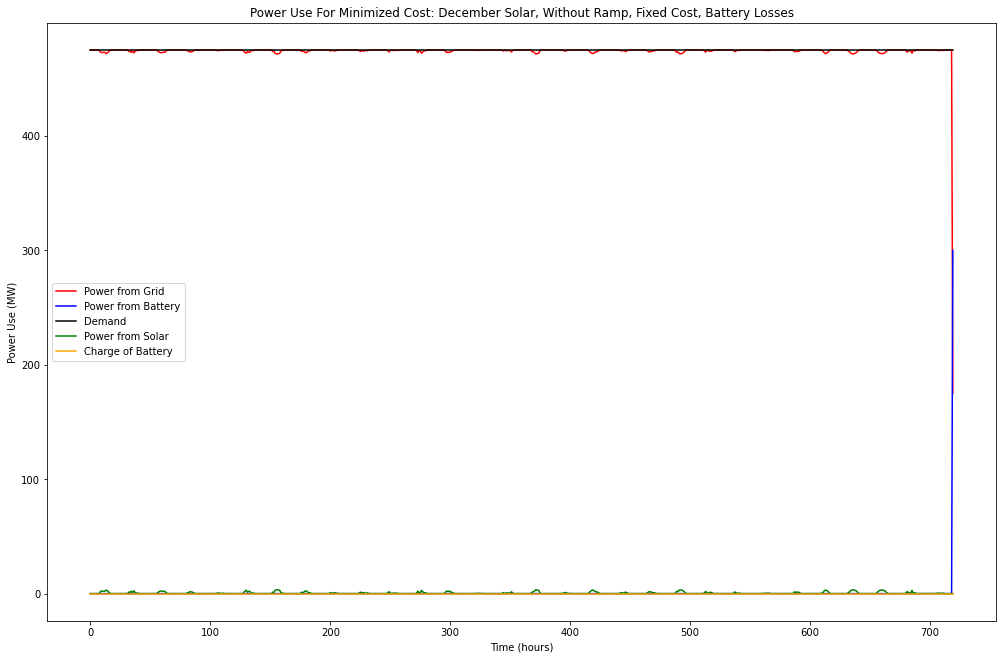

In [15]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 720 #hours

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 11.xlsx')
#print (df)
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L_c']]
    
#defining capacity of battery
E_max = 300 # MW, randomly picked value
eff = 0.99

#defining power draw variables
P_g_1 = cp.Variable(t)
P_ch = cp.Variable(t)
P_dis = cp.Variable(t)


#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
#    C_1 = C_1 + [df.at[n, "Coal"]*P_g_1[n]]
#    C_b = C_b + [(df.at[n, "Coal"])*P_b[n]]
     C_1 = C_1 + [8*(P_g_1[n]+P_ch[n])]
     C_b = C_b + [8*P_dis[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)

#adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_d.xlsx')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] 
constraints += [P_ch >= 0] 
constraints += [1 >= eff] 
constraints += [P_dis >= 0] 
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_ch[n], E_max >= P_dis[n]] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]]
    n+1    
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: December Solar, Without Ramp, Fixed Cost, Battery Losses")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

### solar, no battery loss, random cost: battery size optimize (upper limit 600 mw)

In [13]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 720 #hours

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 11.xlsx')
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    
#defining capacity of battery
E_max = cp.Variable(1)

#defining power draw variables
P_g_1 = cp.Variable(t)
P_ch = cp.Variable(t)
P_dis = cp.Variable(t)

#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
     C_1 = C_1 + [df.at[n, "Cost"]*(P_g_1[n]+P_ch[n])]
     C_b = C_b + [df.at[n, "Cost"]*P_dis[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)

#adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_j.xlsx')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_b + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0]   
constraints += [E_max >= 0, E_max <= 600]  
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_b[n], -P_b[n] >= -E_max] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + P_b[n-1]]
    n+1    
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)
print("Battery Size: ", E_max.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_b.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Battery Sizing for Minimized Cost: June Solar, Without Ramp, Random Cost, No Battery Losses")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

status: unbounded
Minimized Cost: $ -inf
Battery Size:  None


TypeError: 'NoneType' object is not subscriptable